In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_csv("Flipkart_Amazon Mobile Reviews.csv")
df.head()

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name
0,0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."


In [2]:
df.isnull().sum()

Unnamed: 0        0
Review-Title      2
rating            0
Review-Body     617
Product Name      0
dtype: int64

In [3]:
df.dtypes

Unnamed: 0       int64
Review-Title    object
rating          object
Review-Body     object
Product Name    object
dtype: object

In [11]:
df["Review-Body"][1]

"I'm writing this review after using 3days !!!Be to honest this is normal Android phoneIt's not like OnePlusCamera quality very low it says 64mp but notSound also lowBattery 🔋 backup ok !!! For one day normal use itsIf ur Gamer don't go for itOverall price it High for this handsetIf u really wanna buy OnePlus ho for higher end modelI'm first time buying OnePlusLittle disappointment"

In [9]:
df["rating"]

0        1.0 out of 5 stars
1        2.0 out of 5 stars
2        5.0 out of 5 stars
3        3.0 out of 5 stars
4        1.0 out of 5 stars
                ...        
23772    4.0 out of 5 stars
23773    4.0 out of 5 stars
23774    5.0 out of 5 stars
23775    1.0 out of 5 stars
23776    4.0 out of 5 stars
Name: rating, Length: 23777, dtype: object

In [17]:
# d="2.0 out of 5 stars"
# a="1.0 out of 5 stars","2.0 out of 5 stars","3.0 out of 5 stars","4.0 out of 5 stars","5.0 out of 5 stars"
# # "2.0 out of 5 stars"
# # "3.0 out of 5 stars"
# # "4.0 out of 5 stars"
# # "5.0 out of 5 stars"
# c=[]
# if d in a:
#   if d in a[0]:
#     c.append(1)
#   elif d in a[1]:
#     c.append(2)
#   elif d in a[2]:
#     c.append(3)
#   elif d in a[3]:
#     c.append(4)
#   elif d in a[4]:
#     c.append(5)
# else:
#   pass

list

In [4]:
def label_race (row):
  if row['rating'] =="1.0 out of 5 stars":
    return 0
  if row['rating'] =="2.0 out of 5 stars":
      return 0
  if row['rating'] =="3.0 out of 5 stars":
      return 0
  if row['rating'] =="4.0 out of 5 stars":
      return 1
  if row['rating'] =="5.0 out of 5 stars":
      return 1
  return 0
  


In [5]:
df.apply (lambda row: label_race(row), axis=1)

0        0
1        0
2        1
3        0
4        0
        ..
23772    1
23773    1
23774    1
23775    0
23776    1
Length: 23777, dtype: int64

In [6]:
df['output'] = df.apply (lambda row: label_race(row), axis=1)

In [7]:
df.dtypes

Unnamed: 0       int64
Review-Title    object
rating          object
Review-Body     object
Product Name    object
output           int64
dtype: object

In [22]:
# df['race_label'].unique()

array([1, 2, 5, 3, 4])

In [8]:
df['output'].unique()

array([0, 1])

In [9]:
df=df.drop(columns= ['Product Name','rating','Unnamed: 0','Review-Title'])

In [10]:
df.isnull().sum()

Review-Body    617
output           0
dtype: int64

In [11]:
df=df.dropna()

In [12]:
df.isnull().sum()

Review-Body    0
output         0
dtype: int64

In [13]:
df.shape

(23160, 2)

In [9]:
vc_df = pd.DataFrame(df['output'].value_counts()).reset_index()
vc_df.columns = ['Review-Body', 'output'] 
vc_df['output'] = vc_df['output'].map({1 : 'positive', 0: 'negative'}) 
vc_df

,Review-Body,output
0,1,NaN
1,0,NaN


In [14]:
df['output'].value_counts()

1    13818
0     9342
Name: output, dtype: int64

In [16]:
df['review_processed'] = df["Review-Body"].str.replace("[^a-zA-Z0-9]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [21]:
df['review_processed'][1]

'I m writing this review after using 3days    Be to honest this is normal Android phoneIt s not like OnePlusCamera quality very low it says 64mp but notSound also lowBattery   backup ok     For one day normal use itsIf ur Gamer don t go for itOverall price it High for this handsetIf u really wanna buy OnePlus ho for higher end modelI m first time buying OnePlusLittle disappointment'

In [20]:
# df['review_processed'] = df['review_processed'].str.replace("[^a-zA-Z0-9]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [21]:
df['review_processed']= re.sub("[^a-zA-Z]","",str(df['review_processed'])) # Replace all non-letters with spaces

In [21]:
df['review_processed'] = df['review_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

In [22]:
df['review_processed'][0]

'                                              Hang problem          I m writing this review after using  days    B             Camera is so good n very fast phone back look              The media could not be loaded                              I got my delivery on    feb when I unboxed the                                                                        Must he Bhai iss range me bas cemra thoda sa s                                                  Good product                                                       Good          Don t buy this mobile phone money weast screen             Phone is Good   Camera not upto the mark  UI i    Name  review processed  Length         dtype  object'

In [19]:
df['review_processed'][0]==df['review_processed'][2]

False

In [22]:
df['review_processed'] = [review.lower() for review in df['review_processed']if review ]]

SyntaxError: ignored

In [23]:
df['review_processed']= [word.lower() for word in df['review_processed'] if re.match('^[a-zA-Z]+', word)] 

ValueError: ignored

In [24]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')

# Making custom list of words to be removed 
add_words = ['movie','film','one','make','even','like','see','movies','get','makes','making']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['review_processed'] = [remove_stopwords(r) for r in df['review_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# Begin Lemmatization 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['review_processed'] = df['review_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


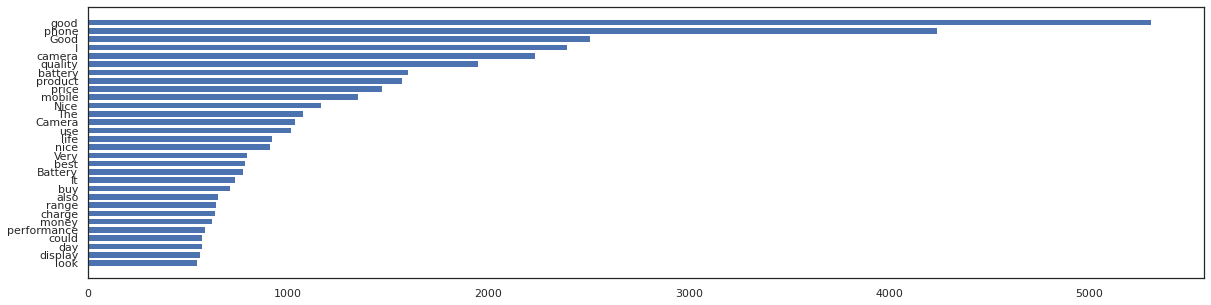

In [28]:
##
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['output'] == 1,:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['review_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

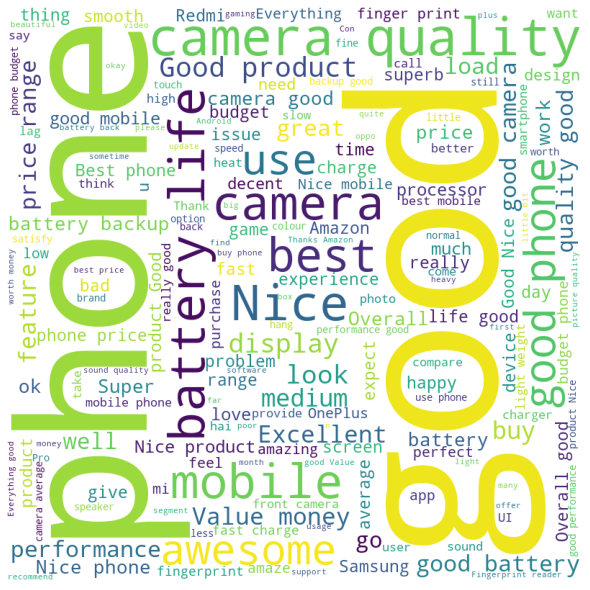

In [30]:
##
## Bilding a Word Cloud
## 
from wordcloud import WordCloud
word_cloud_df = df.loc[df['output'] == 1,:]
all_words = ' '.join([text for text in word_cloud_df['review_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [31]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
# tmp_df = tfidf.fit_transform(df.review_processed)
# feature_names = tfidf.get_feature_names()
# pd.DataFrame(tmp_df.toarray(), columns = feature_names).head() 

X = tfidf.fit_transform(df.review_processed).toarray()
y = df.output.values
featureNames = tfidf.get_feature_names()


X, y


# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
X_train.shape, X_test.shape

((18528, 2500), (4632, 2500))

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[1312  542]
 [ 463 2315]]
The model accuracy is 0.7830310880829016


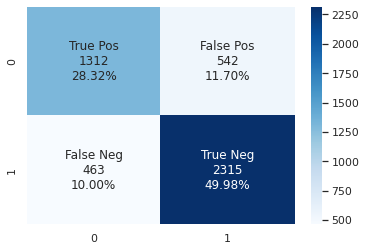

In [35]:
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

0.763908207731731

In [37]:
##featureImportance.sort_values(by='Importance')
featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False)

,Importance,word
97,0.081513,bad
325,0.069846,good
517,0.057770,nice
594,0.032499,poor
118,0.029251,best
...,...,...
815,0.000014,view
778,0.000014,thoda
435,0.000003,likely
538,0.000001,okk
